In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

cali = fetch_california_housing()
data, labels, colNames = cali.data, cali.target, cali.feature_names
data = data[:1000]
labels = labels[:1000]
data = pd.DataFrame(data, columns=colNames)
labels = pd.DataFrame(labels)

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42)

In [2]:
#Gradient boost is an ensemble method where weak learners iteratively minimize the prediction loss.
#Weak learners are sequentially fit with the errors of the previous model. 

def predict(start, model, data, learningRate):
    res = np.array([start] * data.shape[0])
    for weak in model:
        res += learningRate * weak.predict(data)
    return res
    
def gradientBoost(data, labels, iterations, learningRate):
    #start with mean, minimial error with constant value
    start = labels.mean()[0]
    residuals = np.array(labels).flatten() - np.array([start] * len(labels))
    strong = []
    trainMse = []
    testMse = []

    for _ in range(iterations):
        weak = DecisionTreeRegressor(max_depth=3) #fit weak learner to the residuals
        weak.fit(data, residuals)
        pred = weak.predict(data)
        # squared error = 1/2 (label - pred)^2
        #derivative with respect to pred = - (label - pred)
        #current residuals is defined as the negative of the above 
        residuals -= pred * learningRate
        strong.append(weak)
        
        mse = mean_squared_error(predict(start, strong, data, learningRate), labels)
        trainMse.append(mse)
        mse = mean_squared_error(predict(start, strong, xtest, learningRate), ytest)
        testMse.append(mse)

    return start, strong, trainMse, testMse

def plotErrors(trainMse, testMse):
    plt.plot(trainMse, label='Training MSE')
    plt.plot(testMse, label='Test MSE')
    plt.legend()
    plt.show()

start, strong, trainMse, testMse = gradientBoost(xtrain, ytrain, 100, 0.1)

mse test: 0.1071171627045495


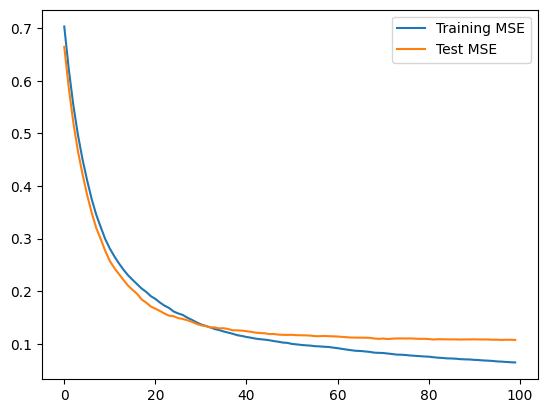

In [3]:
pred = predict(start, strong, xtest, 0.1)
mse = mean_squared_error(pred, ytest)
print("mse test:", mse)
plotErrors(trainMse, testMse)

In [4]:
#tests results with scikit-learn library
libraryTree = GradientBoostingRegressor(max_depth=3, learning_rate=0.1)
libraryTree.fit(xtrain, np.array(ytrain).flatten())

pred = libraryTree.predict(xtest)
mse = mean_squared_error(pred, ytest)
print("mse test:", mse)
pred = libraryTree.predict(xtrain)
mse = mean_squared_error(pred, ytrain)
print("mse train:", mse)

mse test: 0.10725085214090722
mse train: 0.06423757619444409
